In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as st
import matplotlib.mlab as mlab
import math
%matplotlib inline

In [2]:
def bootstrap(arr,n_boots):
    '''
    variables:
        arr = the data that we are random sampling from
        n_boots = the number of bootstraps we want to make
    
    returns:
        list of lists containing the number of bootstrap
        samples we wanted to make
    '''
    return np.array([resample(arr) for _ in xrange(n_boots)])

In [3]:
def bootstrap_means(boots):
    '''
    variables:
        boots = our list of lists of the individual bootstraps
        
    returns:
        list of all of the means of the individual bootstraps
    '''
    return np.array([np.mean(boot) for boot in boots])

In [4]:
df = pd.read_csv('data/Grades-Table 1.csv')

### From here we will be comparing the means of final grades between Flip Class and Traditional Class

In [5]:
df_f = df[df.Treatment == 'F'] # dataframe of treatment group F
df_t = df[df.Treatment == 'T'] # dataframe of treatment group T

In [6]:
f_grades = np.array(df_f.FINAL_RAW_BASE_GRADE) # list of the final grades for treatment group F
t_grades = np.array(df_t.FINAL_RAW_BASE_GRADE) # list of the final grades for treatment group T

In [7]:
f_boots = bootstrap(f_grades, 1000) # bootstrap samples for treatment group F
t_boots = bootstrap(t_grades, 1000) # bootstrap samples for treatment group T

In [8]:
f_boot_means = bootstrap_means(f_boots) # means of the bootstrap samples for treatment group F
t_boot_means = bootstrap_means(t_boots) # means of the bootstrap samples for treatment group T

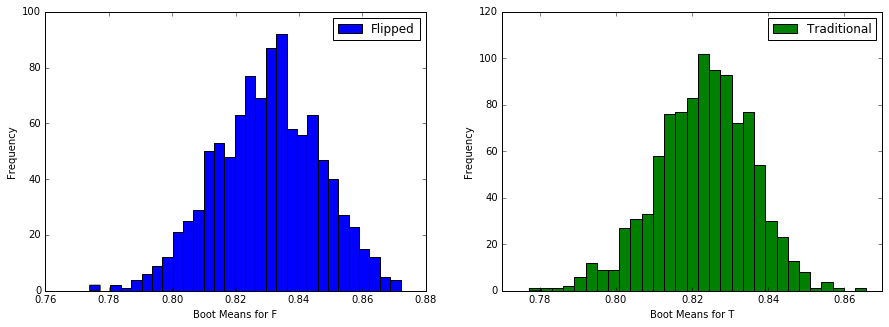

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(f_boot_means, bins = 30, label = 'Flipped')
plt.xlabel('Boot Means for F')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(122)
plt.hist(t_boot_means, bins = 30, color = 'g', label = 'Traditional')
plt.xlabel('Boot Means for T')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
f_mean = f_boot_means.mean() # the mean of the F bootstrap sample means
t_mean = t_boot_means.mean() # the mean of the T bootstrap sample means

t_std = t_boot_means.std() / np.sqrt(len(t_boot_means)) # std for central limit therom

z_t = (f_mean - t_mean) / t_std # z score

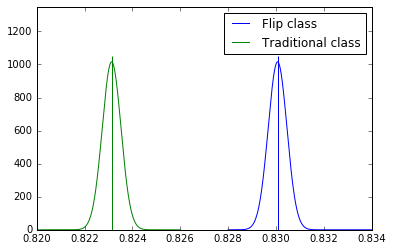

In [59]:
x_f = np.linspace(.828, .834, 2000)
plt.plot(x_f, mlab.normpdf(x_f, f_mean, t_std), label = 'Flip class')
plt.vlines(f_mean, 0, 1050, color = 'b')

x_t = np.linspace(.82, .826, 2000)
plt.plot(x_t, mlab.normpdf(x_t, t_mean, t_std), color = 'g', label = 'Traditional class')
plt.vlines(t_mean, 0, 1050, color = 'g')

plt.legend()
plt.xlim(.82, .834)
plt.ylim(0, 1350)
plt.show()

In [12]:
print "    Flipped Class Final Grade mean:", f_mean
print "Traditional Class Final Grade mean:", t_mean
print "            Z - score for A/B test:", z_t

    Flipped Class Final Grade mean: 0.83007218282
Traditional Class Final Grade mean: 0.823133229987
            Z - score for A/B test: 17.672918005


We have to be very carful with the interpretation of the above graph, the z-score (it's about 14) and the acompanying p-value which is basically 0.0. The bootstrapping procedure has allowed us to do a few usful things. It allowed us to use the Central Limit Therom (CLT) and then compute a z-score instead of a t-test, which is great. Because of the CLT we can say that our findings are not just a fluke; the Flipped class did produce a better final grade than the Traditional class and this relationship would hold if we applied this to the population, not just the sample population that is your class that you experimented on.

The catch is, that with a mean of about 83% and 82% do your findings matter? I say NO, it doesn't matter. You had already come to this conclusion before I did any of this but now you have a good statistical way of saying this.

One last thing, I will talk to one of my teachers next week and make sure everything I have done above is within best practices and make sure the paragraphs I just wrote are the correct interpretation. I want to make sure I'm completely explicit with this interpretation; let's make sure we don't lie with statistics.

### Here we'll compare teachers

In [35]:
df_1 = df[df.Instructor == 1] # dataframe of Instructor 1, 21 students, and only has Treatment T
df_2 = df[df.Instructor == 2] # dataframe of Instructor 2, 41 students
df_3 = df[df.Instructor == 3] # dataframe of Instructor 3, 19 students, and only has Treatment F
df_4 = df[df.Instructor == 4] # dataframe of Instructor 4, 18 students, and only has Treatment T
df_5 = df[df.Instructor == 5] # dataframe of Instructor 5, 38 students
df_6 = df[df.Instructor == 6] # dataframe of Instructor 6, 42 students
df_7 = df[df.Instructor == 7] # dataframe of Instructor 7, 19 students, and only has Treatment F

In [36]:
grades_2 = np.array(df_2.FINAL_RAW_BASE_GRADE) # list of the final grades for Instructor 2
grades_5 = np.array(df_5.FINAL_RAW_BASE_GRADE) # list of the final grades for Instructor 5
grades_6 = np.array(df_6.FINAL_RAW_BASE_GRADE) # list of the final grades for Instructor 6

In [87]:
boots_2 = bootstrap(grades_2, 1000) # bootstrap samples for Instructor 2
boots_5 = bootstrap(grades_5, 1000) # bootstrap samples for Instructor 5
boots_6 = bootstrap(grades_6, 1000) # bootstrap samples for Instructor 6

In [88]:
boot_means_2 = bootstrap_means(boots_2) # means of the bootstrap samples for Instructor 2
boot_means_5 = bootstrap_means(boots_5) # means of the bootstrap samples for Instructor 5
boot_means_6 = bootstrap_means(boots_6) # means of the bootstrap samples for Instructor 6

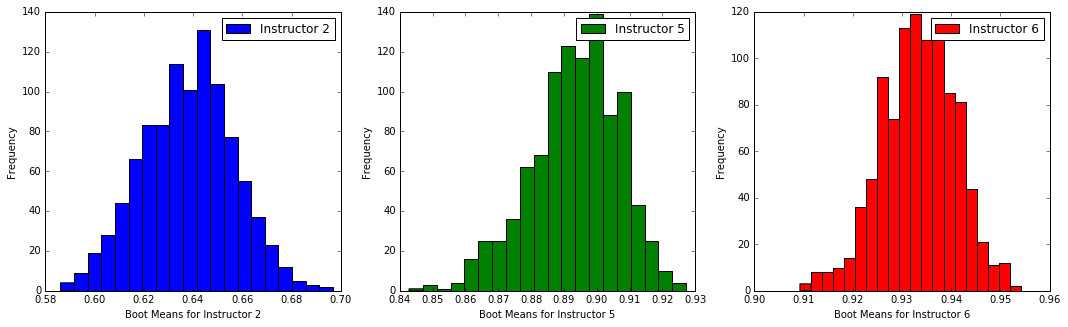

In [96]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(boot_means_2, bins = 20, label = 'Instructor 2')
plt.xlabel('Boot Means for Instructor 2')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(132)
plt.hist(boot_means_5, bins = 20, color = 'g', label = 'Instructor 5')
plt.xlabel('Boot Means for Instructor 5')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(133)
plt.hist(boot_means_6, bins = 20, color = 'r', label = 'Instructor 6')
plt.xlabel('Boot Means for Instructor 6')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [90]:
mean_2 = boot_means_2.mean() # the mean of the Instructor 2 bootstrap sample means
mean_5 = boot_means_5.mean() # the mean of the Instructor 5 bootstrap sample means
mean_6 = boot_means_6.mean() # the mean of the Instructor 6 bootstrap sample means

std_2 = boot_means_2.std() / np.sqrt(len(boot_means_2)) # std for central limit therom 2
std_5 = boot_means_5.std() / np.sqrt(len(boot_means_5)) # std for central limit therom 5
std_6 = boot_means_6.std() / np.sqrt(len(boot_means_6)) # std for central limit therom 6

z_2_5 = (mean_2 - mean_5) / std_2
z_2_6 = (mean_2 - mean_6) / std_2
z_5_6 = (mean_5 - mean_6) / std_5

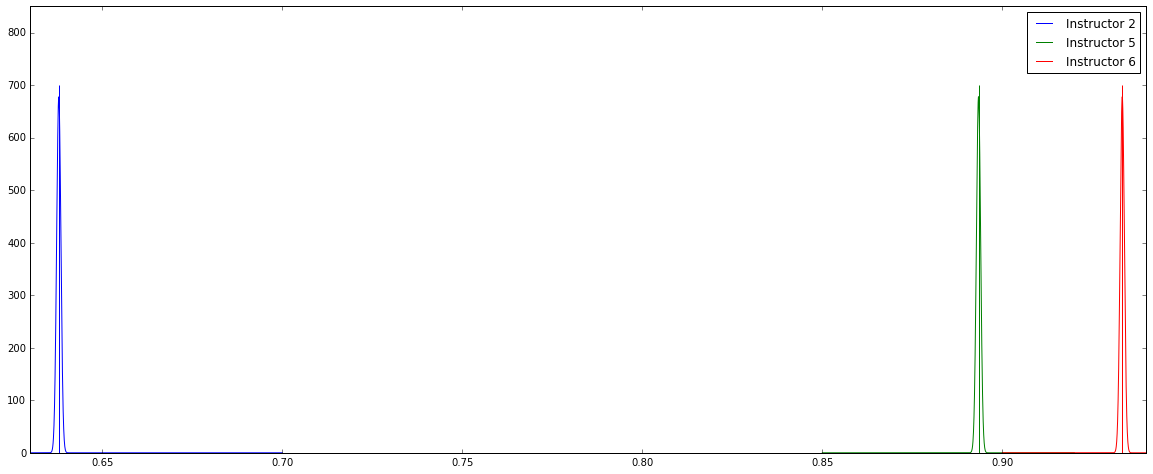

In [138]:
plt.figure(figsize=(20,8))

x_2 = np.linspace(.6, .7, 2000)
plt.plot(x_2, mlab.normpdf(x_2, mean_2, std_2), label = 'Instructor 2')
plt.vlines(mean_2, 0, 700, color = 'b') # .6377

x_5 = np.linspace(.85, .92, 2000)
plt.plot(x_5, mlab.normpdf(x_5, mean_5, std_2), color = 'g', label = 'Instructor 5')
plt.vlines(mean_5, 0, 700, color = 'g')

x_6 = np.linspace(.9, .95, 2000)
plt.plot(x_6, mlab.normpdf(x_6, mean_6, std_2), color = 'r', label = 'Instructor 6')
plt.vlines(mean_6, 0, 700, color = 'r')

plt.legend()
plt.xlim(.63, .94)
plt.ylim(0, 850)
plt.show()

In [104]:
print mean_2
print mean_5
print mean_6

0.637904010815
0.893388
0.933314571429
